Importing keras, numpy, mnist dataset, Conv2D layer and matplotlib for plotting

loading data, printing test and training samples 
also printing first "9 training samples"

(60000, 28, 28) (60000,)


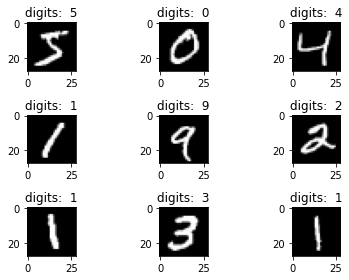

In [2]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


# the data, split between train and test sets
#loading data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)

#printing data

shapes = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i], cmap = 'gray')
    plt.title("digits:  {}".format(y_train[i]))
    





reshaping training data 
covrting all into 1 type grayscale color and dividing 255 to get between (0,1)

In [3]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/ 255
x_test = x_test/255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


defining batch size , no of classes (0,9)= 10 classes, epochs = 10
seqential model 
two filters 32 and 64
size of kernel = 3,3
activation fn = relu
maxpooling 2,2
flattening 
desse layer of 256 
dropout and then atlast 
softmax function
model compilation

In [4]:
batch_size = 128
num_of_classes = 10
epochs = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_of_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

fitting model data and training
saving best trained model 

In [5]:
hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/10
469/469 [==============================] - 69s 146ms/step - loss: 2.2890 - accuracy: 0.1456 - val_loss: 2.2383 - val_accuracy: 0.4474
Epoch 2/10
469/469 [==============================] - 71s 152ms/step - loss: 2.2306 - accuracy: 0.2937 - val_loss: 2.1579 - val_accuracy: 0.6300
Epoch 3/10
469/469 [==============================] - 68s 145ms/step - loss: 2.1507 - accuracy: 0.4282 - val_loss: 2.0433 - val_accuracy: 0.7138
Epoch 4/10
469/469 [==============================] - 68s 144ms/step - loss: 2.0354 - accuracy: 0.5212 - val_loss: 1.8750 - val_accuracy: 0.7391
Epoch 5/10
469/469 [==============================] - 68s 145ms/step - loss: 1.8671 - accuracy: 0.5832 - val_loss: 1.6379 - val_accuracy: 0.7625
Epoch 6/10
469/469 [==============================] - 68s 145ms/step - loss: 1.6421 - accuracy: 0.6277 - val_loss: 1.3616 - val_accuracy: 0.7873
Epoch 7/10
469/469 [==============================] - 68s 145ms/step - loss: 1.4062 - accuracy: 0.6616 - val_loss: 1.1078 - val_ac

printing out final accuracy and loss

In [6]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('loss= ', score[0])
print('accuracy=', score[1])

loss=  0.6865231990814209
accuracy= 0.8443999886512756
